# **Analysis Workflow**



* Data Profiling for Initial Data Cheking : [Sheet Link](https://docs.google.com/spreadsheets/d/1SisSjGoNqagaZBeS8YanFCl-2F_Smbp4cafUiIkOiFw/edit?usp=sharing)
* Data Profiling with YData [Link](https://colab.research.google.com/drive/16o6Y7U2Y8asrwBaNbPxnLLKT_h85E03i?usp=sharing)
* Exploring in Excel.
* EDA
* Task-1: Assigning `engine_type` and `category` to car rows.
* Task-2: Cleaning the data.
* Storing Data in BigQuery Tables.
* Task-3: Visualize and make sense of data.
* Reporting in PowerBI with Data From BigQuery [Live Reports](https://app.powerbi.com/view?r=eyJrIjoiYWE2MjY1YjctZGVjMi00NjNmLWJhMDgtYzQ4ZmMyODdhMTNlIiwidCI6IjdjMjY3ZTkyLWExM2ItNGU1NS05YTc3LTFlZjg2NzE1OTU4NSIsImMiOjEwfQ%3D%3D)


**Note:** Please use the left side panel of the Table of Contents to navigate through the sections.






## Neccessary Libraries

In [ ]:
# for storing data into BigQuery
from google.cloud import bigquery
from google.colab import auth

# for authenticate
auth.authenticate_user()

# initialize the client for Bigquery
project_id = 'keen-phalanx-396514'
client = bigquery.Client(project_id, location='US')

# for Cleaning, Analyzing & Charts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

#for live powerbi reports
from IPython.display import IFrame

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Reading the data from Drive

In [ ]:
# file path
file_path_info = '/content/drive/MyDrive/Python/Datasets/Assignment/car-golf-info.csv'
file_path_main = '/content/drive/MyDrive/Python/Datasets/Assignment/car-golf-dataset.csv'

# Reading the CSV file
df_info = pd.read_csv(file_path_info, delimiter=';')
df_main = pd.read_csv(file_path_main, delimiter=';')


## Initial data Explorations

In [ ]:
# Display the first few rows of car-golf-info
df_info.head()

,id,make,model,submodel,modification_key,modification,fuel,door_count,capacity,power1,...,construction_start,construction_end,meta,final_submodel,parsed_model,parsed_engine_type,parsed_engine_size,parsed_options,parsed_category,parsed_transmission
0,28,VW,GOLF (2008 - 2012) VI,VW GOLF (2008 - 2012) VI Cabrio,20552357-aff2-5384-afab-4619c87aa3c2,Golf 2.0 TDI,D,2,1968,103,...,2008,2013,"{""raw"":""Golf 2.0 TDI\nD\n2\n1968\n 103 (140)\n...",NaN,Golf,TDI,2.0,NaN,Cabriolet/Roadster,manual
1,29,VW,GOLF (2008 - 2012) VI,VW GOLF (2008 - 2012) VI Hečbekas,6c829bae-42c8-5984-bfc0-820965aeb421,Golf 1.6 TDI DPF Trendline M5,D,5,1598,66,...,2009,2013,"{""raw"":""Golf 1.6 TDI DPF Trendline M5\nD\n5\n1...",NaN,Golf,TDI,1.6,DPF Trendline M5,Small Car,manual
2,30,VW,GOLF (2008 - 2012) VI,VW GOLF (2008 - 2012) VI Hečbekas,42028b3d-a694-5936-a0fa-7507eae4be7a,Golf 1.6 TDI DPF Trendline M5,D,5,1598,77,...,2009,2013,"{""raw"":""Golf 1.6 TDI DPF Trendline M5\nD\n5\n1...",NaN,Golf,TDI,1.6,DPF Trendline M5,Small Car,manual
3,31,VW,GOLF (2008 - 2012) VI,VW GOLF (2008 - 2012) VI Hečbekas,0be7d442-c4bd-5a70-8f90-2c1e1dcf09b3,Golf 1.6 TDI DPF BlueMotion M5,D,5,1598,77,...,2009,2013,"{""raw"":""Golf 1.6 TDI DPF BlueMotion M5\nD\n5\n...",NaN,Golf,TDI,1.6,DPF BlueMotion M5,Small Car,manual
4,32,VW,GOLF (2008 - 2012) VI,VW GOLF (2008 - 2012) VI Hečbekas,853c23c7-5ffe-5549-9bcc-059554c8c5d4,Golf 1.6 TDI DPF Comfortline M5,D,5,1598,77,...,2009,2013,"{""raw"":""Golf 1.6 TDI DPF Comfortline M5\nD\n5\...",NaN,Golf,TDI,1.6,DPF Comfortline M5,Small Car,manual


In [ ]:
# Display the first few rows of car-golf-datasets
df_main.head()

,source_id,title,category,make,model,power,color,capacity,transmission,fuel,construction_year,price_net,price_gross,added,mileage,url
0,286354023,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",Estate Car,volkswagen,golf,123,NaN,1395,Manual gearbox,Petrol,2015-01-01 00:00:00.000000,10466.0,12140,2020-11-26 01:11:25.000000,76973,https://suchen.mobile.de/fahrzeuge/details.htm...
1,312826845,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,Estate Car,volkswagen,golf,181,NaN,1968,Automatic transmission,Diesel,2017-01-01 00:00:00.000000,19784.0,22950,2020-11-26 01:12:39.000000,91800,https://suchen.mobile.de/fahrzeuge/details.htm...
2,311592214,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,Saloon,volkswagen,golf,148,NaN,1968,Automatic transmission,Diesel,2016-01-01 00:00:00.000000,NaN,15920,2020-11-26 01:12:55.000000,92004,https://suchen.mobile.de/fahrzeuge/details.htm...
3,312569111,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,Van / Minibus,volkswagen,golf,109,NaN,1197,Manual gearbox,Petrol,2015-01-01 00:00:00.000000,NaN,14900,2020-11-26 01:29:05.000000,56150,https://suchen.mobile.de/fahrzeuge/details.htm...
4,299066532,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,Saloon,volkswagen,golf,109,NaN,1598,Manual gearbox,Diesel,2016-01-01 00:00:00.000000,NaN,13450,2020-11-26 01:29:40.000000,88500,https://suchen.mobile.de/fahrzeuge/details.htm...


## Exploratory Data Analysis

In [ ]:
print(f"df_info shape: {df_info.shape}, df_main shape: {df_main.shape}")


df_info shape: (420, 22), df_main shape: (77744, 16)


### **Findings on Data Shape:**
* **Data Size:** car-golf-info has 420 rows and 22 columns, while car-folf-dataset has 77,744 rows and 16 columns, suggesting car-golf-dataset  is much larger but with fewer details per record.
* **Column Count:** car-golf-info has more columns than car-golf-dataset, which we will have to use for map & marging the data for further analysis.

In [ ]:
print("\n---- DataFrame Info ----")
print("df_info:")
df_info.info()
print("\n")
print("df_main:")
df_main.info()


---- DataFrame Info ----
df_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   420 non-null    int64  
 1   make                 420 non-null    object 
 2   model                420 non-null    object 
 3   submodel             420 non-null    object 
 4   modification_key     420 non-null    object 
 5   modification         420 non-null    object 
 6   fuel                 420 non-null    object 
 7   door_count           420 non-null    int64  
 8   capacity             420 non-null    int64  
 9   power1               420 non-null    int64  
 10  power2               420 non-null    int64  
 11  weight               420 non-null    float64
 12  construction_start   420 non-null    int64  
 13  construction_end     420 non-null    int64  
 14  meta                 420 non-null    object 
 15  final

In [ ]:
print("\n---- Descriptive Statistics ----")
print("df_info:")
print(df_info.describe().T)
print("\n")
print("df_main:")
print(df_main.describe().T)


---- Descriptive Statistics ----
df_info:
                    count         mean         std     min      25%      50%  \
id                  420.0   672.845238  431.902664    28.0   132.75   795.50   
door_count          420.0     4.780952    0.636682     2.0     5.00     5.00   
capacity            420.0  1527.766667  331.125041     0.0  1390.00  1498.00   
power1              420.0   100.461905   33.395596    59.0    81.00    91.00   
power2              420.0   136.116667   45.379999    80.0   110.00   123.50   
weight              420.0     1.856381    0.159372     0.0     1.78     1.87   
construction_start  420.0  2014.447619    4.402171  2008.0  2009.75  2016.00   
construction_end    420.0  2017.897619    4.313103  2010.0  2013.00  2018.00   
final_submodel        0.0          NaN         NaN     NaN      NaN      NaN   
parsed_engine_size  418.0     1.544498    0.323249     1.0     1.40     1.50   

                          75%      max  
id                  1015.2500  1479

### **Findings from Descriptive Statistics:**

**car-golf-info:**

* door_count: The majority of vehicles have 5 doors, as indicated by the mean of 4.78 and 75% of the values being 5.
* capacity: The capacity varies between 0 and 1984, with a mean of 1527, which suggests a wide range of vehicle sizes.
* power1 and power2: These values range from 59 to 245 for power1 and from 80 to 333 for power2. The mean values suggest moderate power output for these vehicles.
* weight: The vehicles' weight is on average around 1.86 tons, with a range between 0 and 2.18 tons. Some records might be missing or inaccurate (e.g., 0 weight).
* construction_start and construction_end: These columns indicate vehicles mostly built between 2008 and 2024, with the mean construction years around 2014 and 2017, respectively.
* parsed_engine_size: The mean engine size is approximately 1.54 liters, with a small standard deviation, suggesting relatively consistent engine sizes across the dataset.

**car-golf-dataset:**

* power: The power values range from 0 to 558, with a mean of about 155, indicating a range of vehicles with varying power outputs. The mean and 50th percentile values are both around 148, which suggests most vehicles have average power in the 100-150 range.

* capacity: With a mean of 1583 and a max value of 14,998, the dataset contains a wide range of vehicle capacities, with many smaller vehicles but also some with large capacities.
* price_net: The net price of vehicles ranges from 2,213 to 294,008, with a mean of approximately 22,901. There’s a significant skew in the prices, as the 75th percentile value is around 26,882, suggesting that a large number of vehicles are priced lower.
* price_gross: The gross price follows a similar pattern to price_net, ranging from 1,500 to 899,900, with a mean of 22,350.
* mileage: The mileage of the vehicles ranges from 0 to 1,750,000, with a mean of about 68,985, and a high standard deviation. Most vehicles seem to have mileage in the lower range, but there are some with exceptionally high mileage.

In [ ]:
# Checking for Missing Values
print("\n---- Missing Values ----")
print("df_info missing values:")
print(df_info.isnull().sum())
print("\n")
print("df_main missing values:")
print(df_main.isnull().sum())


---- Missing Values ----
df_info missing values:
id                       0
make                     0
model                    0
submodel                 0
modification_key         0
modification             0
fuel                     0
door_count               0
capacity                 0
power1                   0
power2                   0
weight                   0
construction_start       0
construction_end         0
meta                     0
final_submodel         420
parsed_model             0
parsed_engine_type      14
parsed_engine_size       2
parsed_options          13
parsed_category          0
parsed_transmission      0
dtype: int64


df_main missing values:
source_id                0
title                    0
category                 0
make                   115
model                    0
power                    0
color                 7235
capacity                 0
transmission            49
fuel                   487
construction_year        0
price_net           

### **Findings on Missing values:**

**car-golf-info:**

* The final_submodel column is entirely missing (420 values), we can ignore that column.
* Minor missing values in parsed_engine_type (14), parsed_engine_size (2), and parsed_options (13) suggest these fields may require imputation or further examination.

**car-golf-dataset:**

* make has 115 missing values, and fuel has 487 missing values, which may affect grouping or filtering based on vehicle specifications.
* color has a significant number of missing entries (7,235), possibly limiting detailed analysis on color-based trends.
* price_net is missing in 30,300 rows, which is substantial and could affect any financial or value-based analyses.

In [ ]:
# Checking for Duplicate Rows
print("\n---- Duplicate Rows ----")
print("car-golf-info duplicates:", df_info.duplicated().sum())
print("car-golf-dataset duplicates:", df_main.duplicated().sum())


---- Duplicate Rows ----
car-golf-info duplicates: 0
car-golf-dataset duplicates: 19



### **Findings on Duplicate Rows:**
* There are no duplicate rows in the car-golf-info.
* There are 19 duplicate rows in the car-golf-dataset, which should be investigated and handled.

In [ ]:
# Column Comparison: Common and Unique Columns
common_columns = set(df_info.columns).intersection(set(df_main.columns))
unique_to_info = set(df_info.columns) - set(df_main.columns)
unique_to_main = set(df_main.columns) - set(df_info.columns)

print("\n---- Column Comparison ----")
print("Common columns:", common_columns)
print("Columns unique to df_info:", unique_to_info)
print("Columns unique to df_main:", unique_to_main)


---- Column Comparison ----
Common columns: {'fuel', 'capacity', 'model', 'make'}
Columns unique to df_info: {'power2', 'parsed_engine_size', 'meta', 'weight', 'door_count', 'parsed_transmission', 'power1', 'id', 'submodel', 'parsed_category', 'modification', 'parsed_model', 'parsed_options', 'final_submodel', 'modification_key', 'construction_end', 'construction_start', 'parsed_engine_type'}
Columns unique to df_main: {'construction_year', 'category', 'color', 'source_id', 'price_net', 'added', 'title', 'price_gross', 'mileage', 'url', 'power', 'transmission'}


# **Task-1**

## **1.1 Assigning correct engine_type**

* Assigning `engine_type` by mapping keywords in `title` to `parsed_engine_type` from `car-golf-info`

In [ ]:
engine_types_info = df_info['parsed_engine_type'].dropna().unique()
engine_types_info

array(['TDI', 'TSI', 'GTI', 'R', 'GTD', 'e-Golf', 'TDI-CR',
       'TSI Plug-In-Hybrid GTE', 'eTSI', 'TSI eHybrid', 'TSI GTE'],
      dtype=object)

In [ ]:
# Function to map engine type based on keywords in `title`
def map_engine_type(title, engine_types):
    for engine_type in engine_types:
        if engine_type in title:
            return engine_type
    return np.nan


In [ ]:
# Apply the engine type mapping to `title` in `df_dataset`
df_main['engine_type'] = df_main['title'].apply(lambda x: map_engine_type(x, engine_types_info))

In [ ]:
df_main['engine_type'].unique()

array([nan, 'TDI', 'TSI', 'R', 'GTD', 'GTI', 'e-Golf'], dtype=object)

In [ ]:
df_main['engine_type'].value_counts()

,count
engine_type,
TSI,34185
TDI,19474
R,5391
GTI,3288
GTD,814
e-Golf,482


In [ ]:
nan_count = df_main['engine_type'].isna().sum()
print(f"Number of NaN values in engine_type column: {nan_count}")


Number of NaN values in engine_type column: 14110


### **Comments:**

* Using the engine type mapping function based on the title column, we were able to successfully categorize the engine types for 63,634 rows out of the total 77,744 rows in the car-golf-dataset.

* This leaves us with 14,110 rows where the engine type could not be mapped (NaN values), suggesting that either the engine type is not explicitly mentioned in the title or the mapping function needs refinement.

## 1.2: Aligning `category` to car rows
* Using keywords from `submodel` and `parsed_category` in `car-golf-info`

In [ ]:
submodel_category_map = df_info[['submodel', 'parsed_category']].dropna().drop_duplicates()
submodel_category_map

,submodel,parsed_category
0,VW GOLF (2008 - 2012) VI Cabrio,Cabriolet/Roadster
1,VW GOLF (2008 - 2012) VI Hečbekas,Small Car
61,VW GOLF (2008 - 2012) VI Universalas,Estate Car
92,VW GOLF PLUS (2008 - 2013) VI Vienatūris,Van/Minibus
121,VW GOLF (2012 - 2020) VII Hečbekas,Small Car
147,VW GOLF (2012 - 2020) VII Universalas,Estate Car
178,VW GOLF ALLTRACK (2014 - 2020) Universalas,Estate Car
182,VW GOLF SPORTSVAN (2014 - 2020) Universalas,Estate Car
343,VW GOLF (2019 - ) VIII Hečbekas,Small Car
362,VW GOLF (2019 - ) VIII Universalas,Estate Car


In [ ]:
submodel_category_dict = dict(zip(submodel_category_map['submodel'], submodel_category_map['parsed_category']))
submodel_category_dict

{'VW GOLF (2008 - 2012)  VI Cabrio': 'Cabriolet/Roadster',
 'VW GOLF (2008 - 2012)  VI Hečbekas': 'Small Car',
 'VW GOLF (2008 - 2012)  VI Universalas': 'Estate Car',
 'VW GOLF PLUS (2008 - 2013) VI  Vienatūris': 'Van/Minibus',
 'VW GOLF (2012 - 2020) VII Hečbekas': 'Small Car',
 'VW GOLF (2012 - 2020) VII Universalas': 'Estate Car',
 'VW GOLF ALLTRACK (2014 - 2020)  Universalas': 'Estate Car',
 'VW GOLF SPORTSVAN (2014 - 2020)  Universalas': 'Estate Car',
 'VW GOLF (2019 - ) VIII Hečbekas': 'Small Car',
 'VW GOLF (2019 - ) VIII Universalas': 'Estate Car'}

In [ ]:
# Function to align category based on submodel keywords in `title`
def refined_map_category(title, submodel_dict):
    title = title.lower()
    for submodel, category in submodel_dict.items():
        if re.search(rf'\b{submodel.lower()}\b', title):
            return category
    return np.nan

In [ ]:
# Apply the category alignment function to `title` in `df_dataset`
df_main['aligned_category'] = df_main['title'].apply(lambda x: refined_map_category(x, submodel_category_dict))


In [ ]:
# Displaying the result to confirm category alignment
df_main[['title', 'aligned_category']].head()


,title,aligned_category
0,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",NaN
1,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,NaN
2,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,NaN
3,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,NaN
4,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,NaN


In [ ]:
df_main['aligned_category'].unique()

array([nan])

### **Comments Try-1:**
* The initial attempt to align category yielded NaN values, which suggests that keyword matches may not be capturing the intended submodels.
* To improve accuracy, I’ll refine the matching logic by examining the submodel entries more closely and ensuring case-insensitive matching.
* Let’s adjust the code to handle potential formatting issues and reapply.

**Refining the submodel-to-category alignment to handle formatting and case insensitivity**

In [ ]:
submodel_category_dict = {re.sub(r'\W+', '', submodel.lower()): category for submodel, category in submodel_category_dict.items()}
submodel_category_dict

{'vwgolf20082012vicabrio': 'Cabriolet/Roadster',
 'vwgolf20082012vihečbekas': 'Small Car',
 'vwgolf20082012viuniversalas': 'Estate Car',
 'vwgolfplus20082013vivienatūris': 'Van/Minibus',
 'vwgolf20122020viihečbekas': 'Small Car',
 'vwgolf20122020viiuniversalas': 'Estate Car',
 'vwgolfalltrack20142020universalas': 'Estate Car',
 'vwgolfsportsvan20142020universalas': 'Estate Car',
 'vwgolf2019viiihečbekas': 'Small Car',
 'vwgolf2019viiiuniversalas': 'Estate Car'}

In [ ]:
# Enhanced function to map category with refined dictionary and formatting adjustments
def improved_map_category(title, submodel_dict):
    title_cleaned = re.sub(r'\W+', '', title.lower())  # Remove special characters and spaces
    for submodel, category in submodel_dict.items():
        if submodel in title_cleaned:
            return category
    return np.nan

In [ ]:
# Applying the improved category alignment function
df_main['aligned_category'] = df_main['title'].apply(lambda x: improved_map_category(x, submodel_category_dict))

In [ ]:
# Displaying the result to confirm if category alignment improved
df_main[['title', 'aligned_category']].head()


,title,aligned_category
0,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",NaN
1,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,NaN
2,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,NaN
3,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,NaN
4,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,NaN


In [ ]:
df_main['aligned_category'].unique()

array([nan])

### **Comments Try-2:**
* The refined approach is still not producing expected matches, which may indicate that the submodel terms in car-golf-dataset.csv titles are not closely aligned with those in car-golf-info.csv.
* I’ll further investigate by checking for a few sample submodels and title patterns to better understand any discrepancies.
* Let’s identify key submodel patterns in both datasets to troubleshoot this alignment more effectively.


**Checking unique values in `submodel` from `df_info` and a sample of titles in `df_dataset` to analyze possible discrepancies.**


In [ ]:
unique_submodels = df_info['submodel'].unique()
unique_submodels

array(['VW GOLF (2008 - 2012)  VI Cabrio',
       'VW GOLF (2008 - 2012)  VI Hečbekas',
       'VW GOLF (2008 - 2012)  VI Universalas',
       'VW GOLF PLUS (2008 - 2013) VI  Vienatūris',
       'VW GOLF (2012 - 2020) VII Hečbekas',
       'VW GOLF (2012 - 2020) VII Universalas',
       'VW GOLF ALLTRACK (2014 - 2020)  Universalas',
       'VW GOLF SPORTSVAN (2014 - 2020)  Universalas',
       'VW GOLF (2019 - ) VIII Hečbekas',
       'VW GOLF (2019 - ) VIII Universalas'], dtype=object)

In [ ]:
sample_titles = df_main['title'].sample(10).tolist()
sample_titles

['Volkswagen Golf VI Variant Trendline.Klima.Navi.AHK',
 'Volkswagen Golf Variant Life 1,5eTSI DSG 96KW SHZ, Sunse...',
 'Volkswagen Golf VII Variant Trendline BMT/Start-Stopp',
 'Volkswagen Volkswagen Golf Diesel',
 'Volkswagen Golf VIII Variant 2.0TDI DSG Life',
 'Volkswagen VOLKSWAGEN - Golf - 1.6 TDI DPF 5p. Highline',
 'Volkswagen Golf 2.0 TDI DSG R-Line LED Pano Nav ACC Kam 18"',
 'Volkswagen Golf VIII Move 1.5 eTSI DSG / Navi, LED, App,RFK',
 'Volkswagen Golf VII GTI TCR 2.0 TSI DSG AKRAPOVIC LED Front',
 'Volkswagen Golf 1.2 TSI LOUNGE / Standheizung / GRA / SH']

* The submodel values in car-golf-info.csv contain terms that are relatively complex and may include regional or descriptive words like "Hečbekas" (likely referring to "hatchback" in Lithuanian) and "Universalas" (possibly meaning "wagon" or "estate").
* These specific regional terms might not appear in the title field of car-golf-dataset.csv, which uses more standard model names like "Variant," "Highline," or "Comfortline."

However lets try simplify the submodel values to focus on core terms (like “Golf,” "Variant," and "Sportsvan") and re-attempt the mapping with these basic terms. This adjustment should improve our ability to align categories effectively.


**Simplify the `submodel` to focus on core terms for improved matching with titles**

In [ ]:
# Extract the core submodel and body type
df_info['core_submodel'] = df_info['submodel'].str.extract(r'VW\s*GOLF\s*(\S+)\s*(\S+)')[0]
df_info['body_type'] = df_info['submodel'].str.extract(r'VW\s*GOLF\s*\S+\s*(\S+)')[0]

In [ ]:
# Create a dictionary using core_submodel and body_type as keys
submodel_category_map = df_info[['core_submodel', 'body_type', 'parsed_category']].dropna().drop_duplicates()

In [ ]:
submodel_category_dict = {}
for _, row in submodel_category_map.iterrows():
    submodel_category_dict[(row['core_submodel'].lower(), row['body_type'].lower())] = row['parsed_category']

In [ ]:
# Function to check exact matches between title and submodel components
def exact_match_category(title, submodel_dict):
    title = title.lower()
    for (core_submodel, body_type), category in submodel_dict.items():
        if core_submodel in title and body_type in title:
            return category
    return None

In [ ]:
# Apply exact match first
df_main['aligned_category_exact'] = df_main['title'].apply(lambda x: exact_match_category(x, submodel_category_dict))

In [ ]:
# Fuzzy matching function for better flexibility
def fuzzy_match_category(title, submodel_dict, threshold=80):
    title = title.lower()
    best_match = None
    best_score = 0
    for (core_submodel, body_type), category in submodel_dict.items():
        score_submodel = fuzz.partial_ratio(core_submodel, title)
        score_body_type = fuzz.partial_ratio(body_type, title)

        # Combine scores for better matching
        combined_score = (score_submodel + score_body_type) / 2

        if combined_score > best_score and combined_score >= threshold:
            best_score = combined_score
            best_match = category
    return best_match

In [ ]:
# Apply fuzzy match for those where exact match was not found
df_main['aligned_category'] = df_main.apply(
    lambda row: row['aligned_category_exact'] if pd.notna(row['aligned_category_exact'])
    else fuzzy_match_category(row['title'], submodel_category_dict), axis=1)

In [ ]:
# Displaying the result
df_main[['title', 'aligned_category']].head()

,title,aligned_category
0,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",None
1,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,None
2,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,None
3,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,None
4,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,None


In [ ]:
df_main['aligned_category'].unique()

array([None, 'Estate Car', 'Van/Minibus'], dtype=object)

In [ ]:
df_main['aligned_category'].value_counts()

,count
aligned_category,
Estate Car,429
Van/Minibus,2


### **Comments Try-3:**
* With this we can see that we are able to maps only two categories and the values counts are relatively less.

**After investigetting data in excel it can be seen the year range is effecting mapping issues, Lets try with more cleaning Approach and implementing threshold**

In [ ]:
# Remove year ranges from the 'submodel' column
df_info['submodel_cleaned'] = df_info['submodel'].str.replace(r'\s*\(\d{4} - \d{4}\)', '', regex=True)

# Extract the core submodel and body type (now without year ranges)
df_info['core_submodel'] = df_info['submodel_cleaned'].str.extract(r'VW\s*GOLF\s*(\S+)\s*(\S+)')[0]
df_info['body_type'] = df_info['submodel_cleaned'].str.extract(r'VW\s*GOLF\s*\S+\s*(\S+)')[0]

# Create a dictionary using core_submodel and body_type as keys
submodel_category_map = df_info[['core_submodel', 'body_type', 'parsed_category']].dropna().drop_duplicates()

submodel_category_dict = {}
for _, row in submodel_category_map.iterrows():
    submodel_category_dict[(row['core_submodel'].lower(), row['body_type'].lower())] = row['parsed_category']

# Function to check exact matches between title and submodel components
def exact_match_category(title, submodel_dict):
    title = title.lower()
    for (core_submodel, body_type), category in submodel_dict.items():
        if core_submodel in title and body_type in title:
            return category
    return None

# Apply exact match first
df_main['aligned_category_exact'] = df_main['title'].apply(lambda x: exact_match_category(x, submodel_category_dict))

# Fuzzy matching function for better flexibility
def fuzzy_match_category(title, submodel_dict, threshold=80):
    title = title.lower()
    best_match = None
    best_score = 0
    for (core_submodel, body_type), category in submodel_dict.items():
        score_submodel = fuzz.partial_ratio(core_submodel, title)
        score_body_type = fuzz.partial_ratio(body_type, title)

        # Combine scores for better matching
        combined_score = (score_submodel + score_body_type) / 2

        if combined_score > best_score and combined_score >= threshold:
            best_score = combined_score
            best_match = category
    return best_match

# Apply fuzzy match for those where exact match was not found
df_main['aligned_category'] = df_main.apply(
    lambda row: row['aligned_category_exact'] if pd.notna(row['aligned_category_exact'])
    else fuzzy_match_category(row['title'], submodel_category_dict), axis=1)

# Displaying the result
df_main[['title', 'aligned_category']].head()

,title,aligned_category
0,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",None
1,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,None
2,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,None
3,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,None
4,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,None


In [ ]:
df_main['aligned_category'].value_counts()

,count
aligned_category,
Van/Minibus,3175
Cabriolet/Roadster,843
Estate Car,279
Small Car,103


In [ ]:
nan_count = df_main['aligned_category'].isna().sum()
print(f"Number of NaN values in aligned_category column: {nan_count}")

Number of NaN values in aligned_category column: 73344


### **Comments Try-4:**
* With this approach we can the categories increased and values too.
* But the value counts are still less.
* Need more informartion regaring this to come up with more accuracy.

However those are not match lets fill this with existing `Categories` values.

In [ ]:
df_main['aligned_category'] = df_main['aligned_category'].fillna(df_main['category'])

In [ ]:
nan_count = df_main['aligned_category'].isna().sum()
print(f"Number of NaN values in aligned_category column: {nan_count}")

Number of NaN values in aligned_category column: 0


# **Task 2**
* We need to extract the distinct values for fuel, transmission, and power.
* These are key attributes in determining if the title contains any mismatches.
* We'll use hardcoded distinct values.
* Based on them we will map title columns to find out suspicious car rows.
* We'll check if the words in the title column contain any of the defined keywords for fuel, transmission, or power.
* We will flag any rows that do not match with the distinct values as "Suspicious.
* We will create a new column called suspicious, which will be labeled "Suspicious" if there’s any mismatch for fuel, transmission, or power.
* If all mismatches are False, the suspicious column will be "Not Suspicious.

### **`fuels` , `transmission` & `power` mapping**

In [ ]:
distinct_fuels = ['petrol', 'diesel', 'hybrid', 'natural gas', 'electric', 'lpg', 'other']
distinct_transmissions = ['manual', 'automatic', 'semi-automatic', 'auto', 'cvt']
distinct_powers = [123, 181, 148, 109, 114, 84, 296, 208, 129, 241, 197, 103, 306, 201, 121, 89, 227, 217, 315, 138,
                  79, 101, 286, 158, 207, 134, 143, 0, 188, 329, 267, 196, 205, 25, 110, 276, 177, 174, 168, 272, 185,
                  378, 261, 182, 282, 166, 394, 170, 20, 200, 169, 212, 153, 16, 14, 189, 23, 232, 198, 164, 86, 255,
                  558, 215, 400, 251, 56, 295, 55, 211, 19, 503, 15, 213, 7, 66, 160, 83, 326, 228, 21, 473, 337, 398, 18,
                  374, 396, 311, 353, 95, 308, 365, 410, 384, 271, 335, 342, 266, 219, 105, 118, 345, 375, 17, 209, 380,
                  405, 268, 51, 319, 361, 113, 244, 298, 256, 519, 355, 186, 382, 139, 367, 257, 414, 125, 22, 176, 327,
                  102, 408, 247, 424, 225, 141, 117, 274, 111, 346, 512, 516, 381, 354, 316, 288, 404]

In [ ]:
# Define the function to check if a word from the title matches any keyword
def detect_mismatches(row, fuel_keywords, transmission_keywords, power_keywords):
    title = row['title'].lower()  # Convert title to lowercase

    # Check fuel mismatch (match any of the keywords in the title)
    fuel_mismatch = any(re.search(r'\b' + re.escape(fuel.lower()) + r'\b', title) for fuel in fuel_keywords)

    # Check transmission mismatch (match any of the keywords in the title)
    transmission_mismatch = any(re.search(r'\b' + re.escape(transmission.lower()) + r'\b', title) for transmission in transmission_keywords)

    # Check power mismatch (match any of the power values in the title)
    power_mismatch = any(str(power) in title for power in power_keywords)

    return fuel_mismatch, transmission_mismatch, power_mismatch

In [ ]:
# Applying the function to detect mismatches
df_main[['fuel_mismatch', 'transmission_mismatch', 'power_mismatch']] = df_main.apply(lambda row: detect_mismatches(row, distinct_fuels, distinct_transmissions, distinct_powers), axis=1, result_type="expand")

In [ ]:
# Create a new column 'suspicious' based on the mismatch columns
df_main['suspicious'] = df_main.apply(lambda row: 'Yes' if row['fuel_mismatch'] or row['transmission_mismatch'] or row['power_mismatch'] else 'No', axis=1)

In [ ]:
# Inspect the DataFrame with the new 'suspicious' column
df_main[['title', 'fuel_mismatch', 'transmission_mismatch', 'power_mismatch', 'suspicious']].head()

,title,fuel_mismatch,transmission_mismatch,power_mismatch,suspicious
0,"Volkswagen Golf -Black Weeks-Fahrzeug, täglich...",False,False,False,No
1,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,False,False,True,Yes
2,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,False,False,True,Yes
3,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,False,False,False,No
4,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,False,False,True,Yes


In [ ]:
df_main.suspicious.value_counts()

,count
suspicious,
No,41166
Yes,36578


### **Findings:**
* The dataset reveals 41,166 ***non-suspicious*** records (about **53%**) that align with expected patterns in fuel type, transmission, and power values, suggesting data reliability for this portion.
* However, 36,578 records (**47%**) are flagged as ***suspicious***, showing anomalies that may stem from inconsistent entries in attributes like fuel type and transmission type.
* This high anomaly rate indicates potential data quality issues that could impact analyses.

**Lets Store the final car-golf-dataset into BigQuery, for coming up with reports in Power BI**

In [ ]:
# write back to bigquery
df_main.to_gbq('Assignment.car_golf_dataset_main',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

<ipython-input-56-f7ba3b4f3b60>:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_gbq except for the argument 'destination_table' will be keyword-only.
  df_main.to_gbq('Assignment.car_golf_dataset_main',
<ipython-input-56-f7ba3b4f3b60>:2: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df_main.to_gbq('Assignment.car_golf_dataset_main',
100%|██████████| 1/1 [00:00<00:00, 747.65it/s]


# **Task 3:**
* Visualizing Trends in Suspicious Rows

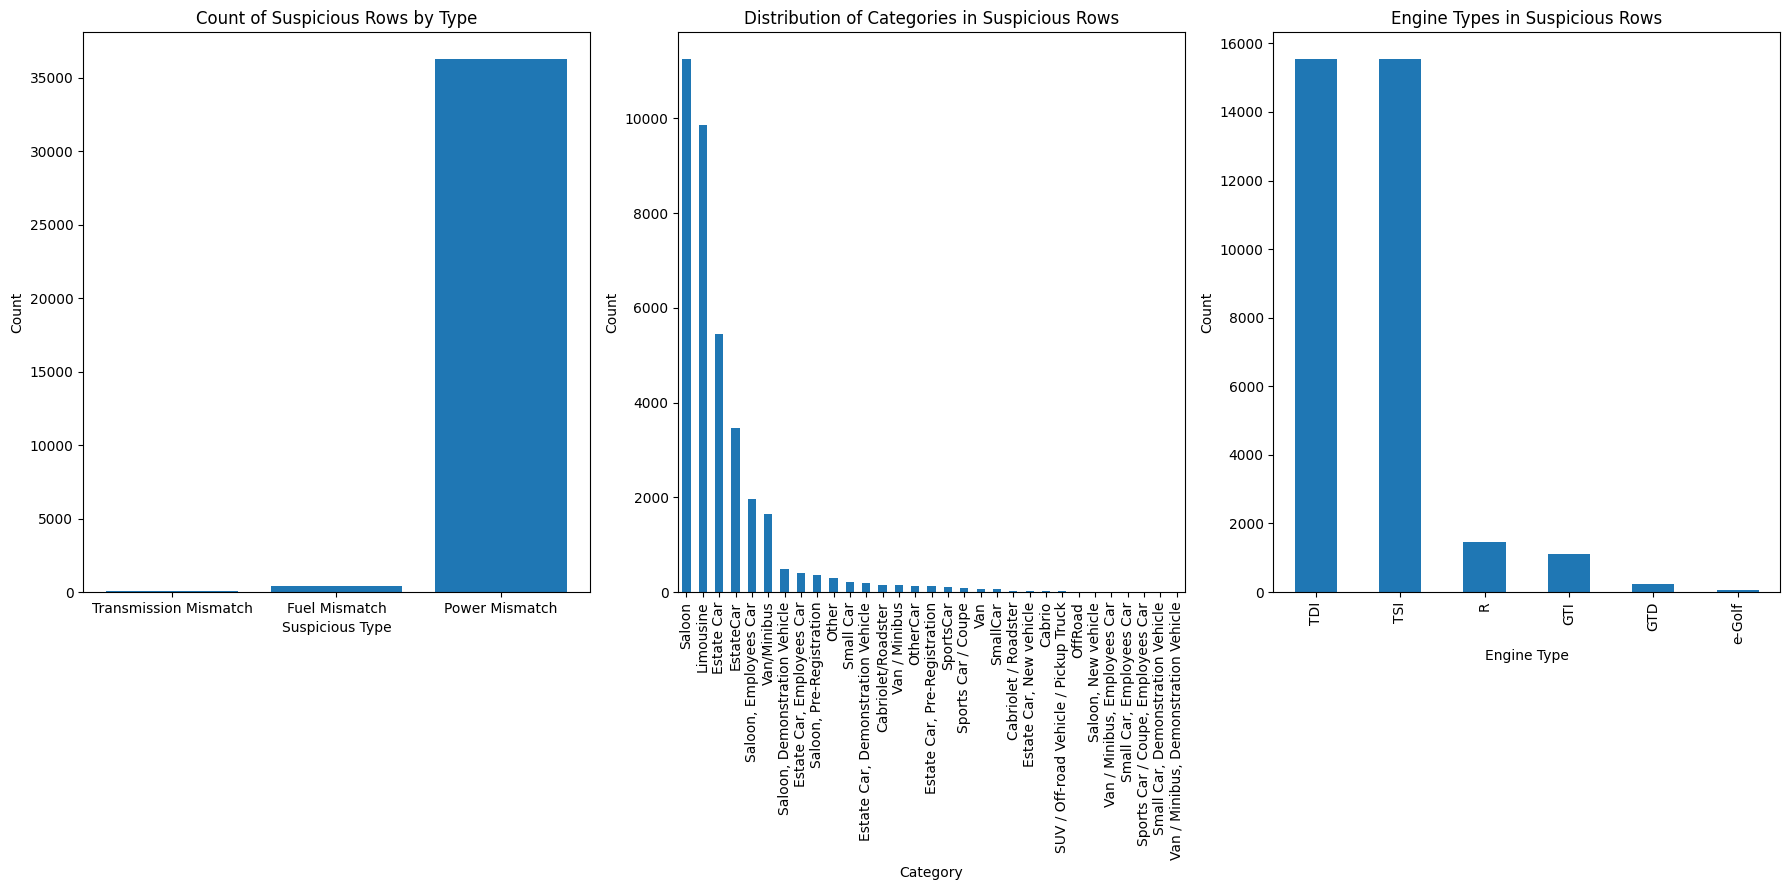

In [ ]:
# Charts Frame
fig, axes = plt.subplots(1, 3, figsize=(18, 9))

# 1. Count of Suspicious Rows by Type
suspicious_counts = {
    "Transmission Mismatch": df_main['transmission_mismatch'].sum(),
    "Fuel Mismatch": df_main['fuel_mismatch'].sum(),
    "Power Mismatch": df_main['power_mismatch'].sum(),
}
axes[0].bar(suspicious_counts.keys(), suspicious_counts.values())
axes[0].set_title("Count of Suspicious Rows by Type")
axes[0].set_xlabel("Suspicious Type")
axes[0].set_ylabel("Count")

# 2. Distribution of Categories in Suspicious Rows
suspicious_rows = df_main[
    df_main[['transmission_mismatch', 'fuel_mismatch', 'power_mismatch']].any(axis=1)
]
category_counts = suspicious_rows['aligned_category'].value_counts()
category_counts.plot(kind="bar", ax=axes[1])
axes[1].set_title("Distribution of Categories in Suspicious Rows")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")

# 3. Engine Types in Suspicious Rows
engine_type_counts = suspicious_rows['engine_type'].value_counts()
engine_type_counts.plot(kind="bar", ax=axes[2])
axes[2].set_title("Engine Types in Suspicious Rows")
axes[2].set_xlabel("Engine Type")
axes[2].set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Findings:**
1. Engine Types in Suspicious Rows:

  * The majority of suspicious rows are associated with the "TSI" & "TDI".
  * Engine types like "R", "GTD," "GTI," and "e-Golf" appear in much smaller numbers, suggesting that these may represent less common vehicle configurations in the dataset.
2. Distribution of Categories in Suspicious Rows:

    * The "Saloon" category dominates the suspicious rows, followed by "Limousine," "Estate Car," and "Sports Car."
    * This indicates that a large portion of the suspicious rows belong to these categories, which could be critical for further analysis or categorization improvements.
3. Count of Suspicious Rows by Type:

    * The graph shows that the "Power Mismatch" type is overwhelmingly dominant, with a very large number of suspicious rows compared to "Transmission Mismatch" and "Fuel Mismatch."
    * This suggests that mismatches in the 'power' column are the primary concern, while transmission and fuel mismatches are less frequent.

# **Live Power BI Reports**

In [ ]:
# Replace the URL below with your Power BI embed link
powerbi_embed_url = "https://app.powerbi.com/view?r=eyJrIjoiYWE2MjY1YjctZGVjMi00NjNmLWJhMDgtYzQ4ZmMyODdhMTNlIiwidCI6IjdjMjY3ZTkyLWExM2ItNGU1NS05YTc3LTFlZjg2NzE1OTU4NSIsImMiOjEwfQ%3D%3D"
IFrame(powerbi_embed_url, width=1200, height=600)
